# Rossmann Sales Project

Some features may not be visible in the GitHub preview. You can view the full notebook using the Google Drive link below.
https://colab.research.google.com/drive/1_ZVKsBauLWxp9L1WVyLxkf2grCw8Ns_Q

## Import libraries & Load raw data


In [6]:
!pip install seaborn
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 38.2 MB/s  0:00:00 eta 0:00:01


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
filename = '../data/rossman_prepared.csv'
raw_df = pd.read_csv(filename)
target_col = 'Sales'

In [5]:
raw_df.shape

(983759, 46)

# Columns data types

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983759 entries, 0 to 983758
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Store                        983759 non-null  int64  
 1   DayOfWeek                    983759 non-null  int64  
 2   Date                         983759 non-null  object 
 3   Sales                        983759 non-null  int64  
 4   Customers                    983759 non-null  int64  
 5   Open                         983759 non-null  int64  
 6   Promo                        983759 non-null  int64  
 7   StateHoliday                 983759 non-null  object 
 8   SchoolHoliday                983759 non-null  int64  
 9   StoreType                    983759 non-null  object 
 10  Assortment                   983759 non-null  object 
 11  CompetitionDistance          983759 non-null  float64
 12  CompetitionOpenSinceMonth    983759 non-null  float64
 13 

## Categorical

In [7]:
categorical_cols = raw_df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)
print(f"Total categorical columns count: {len(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} column unique values count: {raw_df[col].nunique()}")

['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionDistanceCategory']
Total categorical columns count: 6

Date column unique values count: 912

StateHoliday column unique values count: 4

StoreType column unique values count: 4

Assortment column unique values count: 3

PromoInterval column unique values count: 3

CompetitionDistanceCategory column unique values count: 4


## Numeric

In [8]:
numeric_cols = raw_df.select_dtypes(exclude=['object']).columns.tolist()
print(numeric_cols)
print(len(numeric_cols))

['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear', 'Quarter', 'DayOfYear', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd', 'IsQuarterStart', 'IsQuarterEnd', 'CompetitionMonthsOpen', 'Promo2Weeks', 'IsPromoMonth', 'Sales_Lag1', 'Sales_Lag2', 'Sales_Lag3', 'Sales_Lag7', 'Sales_Lag14', 'Sales_Lag30', 'Customers_Lag1', 'Customers_Lag7', 'SalesPerCustomer', 'SalesPerCustomer_Lag1', 'PromoWeekend', 'DaysAfterHoliday', 'DaysBeforeHoliday']
40


In [9]:
raw_df[numeric_cols].describe()

Store      DayOfWeek          Sales      Customers  \
count  983759.000000  983759.000000  983759.000000  983759.000000   
mean      558.444339       4.001682    5794.216983     634.772346   
std       321.909865       1.998154    3860.599343     465.523591   
min         1.000000       1.000000       0.000000       0.000000   
25%       280.000000       2.000000    3745.000000     406.000000   
50%       558.000000       4.000000    5765.000000     611.000000   
75%       838.000000       6.000000    7881.000000     839.000000   
max      1115.000000       7.000000   41551.000000    5494.000000   

                Open          Promo  SchoolHoliday  CompetitionDistance  \
count  983759.000000  983759.000000  983759.000000        983759.000000   
mean        0.830112       0.383153       0.179544          5422.897651   
std         0.375535       0.486155       0.383807          7708.803084   
min         0.000000       0.000000       0.000000            20.000000   
25%         1.000000       0.000000       0.000000           710.000000   
50%         1.000000       0.000000       0.000000          2330.000000   
75%         1.000000       1.000000       0.000000          6880.000000   
max         1.000000       1.000000       1.000000         75860.000000   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear         Promo2  \
count              983759.000000             983759.000000  983759.000000   
mean                    4.926740               1370.146448       0.500171   
std                     4.283561                935.374158       0.500000   
min                     0.000000                  0.000000       0.000000   
25%                     0.000000                  0.000000       0.000000   
50%                     4.000000               2006.000000       1.000000   
75%                     9.000000               2011.000000       1.000000   
max                    12.000000               2015.000000       1.000000   

       Promo2SinceWeek  Promo2SinceYear           Year          Month  \
count    983759.000000    983759.000000  983759.000000  983759.000000   
mean         11.632849      1006.220776    2013.860592       6.011563   
std          15.316473      1005.877338       0.774944       3.257786   
min           0.000000         0.000000    2013.000000       1.000000   
25%           0.000000         0.000000    2013.000000       3.000000   
50%           1.000000      2009.000000    2014.000000       6.000000   
75%          22.000000      2012.000000    2014.000000       9.000000   
max          50.000000      2015.000000    2015.000000      12.000000   

                 Day     WeekOfYear        Quarter      DayOfYear  \
count  983759.000000  983759.000000  983759.000000  983759.000000   
mean       15.709654      24.323284       2.338260     167.267079   
std         8.792014      14.146277       1.072987      99.584062   
min         1.000000       1.000000       1.000000       1.000000   
25%         8.000000      13.000000       1.000000      84.000000   
50%        16.000000      23.000000       2.000000     158.000000   
75%        23.000000      35.000000       3.000000     246.000000   
max        31.000000      52.000000       4.000000     365.000000   

           IsWeekend   IsMonthStart     IsMonthEnd  IsQuarterStart  \
count  983759.000000  983759.000000  983759.000000   983759.000000   
mean        0.285171       0.032904       0.034037        0.010968   
std         0.451496       0.178386       0.181324        0.104153   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.000000       0.000000        0.000000   
50%         0.000000       0.000000       0.000000        0.000000   
75%         1.000000       0.000000       0.000000        0.000000   
max         1.000000       1.000000       1.000000        1.000000   

        IsQuarterEnd  CompetitionMonthsOpen    Promo2Weeks   IsPromoMonth  \
count  983759.000000          98375

# Missing values

In [10]:
##############################
####### Functions ############
##############################
def get_missing_info(df=raw_df, include_dtypes=True, min_missing=1):
  missing_counts = df.isna().sum()
  missing_counts = missing_counts[missing_counts >= min_missing]

  if include_dtypes:
      info = pd.DataFrame({
          'Missing Values': missing_counts,
          'Data Type': df.dtypes
      })
      info = info[info['Missing Values'] > 0]
  else:
      info = pd.DataFrame({'Missing Values': missing_counts})

  return info

##############################
########### Main #############
##############################
print(get_missing_info())

                             Missing Values Data Type
CompetitionDistanceCategory          1824.0    object
PromoInterval                      491711.0    object


In [11]:
raw_df['PromoInterval'].value_counts()

PromoInterval
Jan,Apr,Jul,Oct     283072
Feb,May,Aug,Nov     114696
Mar,Jun,Sept,Dec     94280
Name: count, dtype: int64

In [12]:
raw_df['CompetitionDistanceCategory'].value_counts()

CompetitionDistanceCategory
Close         383096
Very Close    292311
Far           163752
Medium        142776
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

## Correlation

In [18]:
##############################
####### Functions ############
##############################
def get_correlation_details_filtered(df=raw_df, cols=numeric_cols, abs_threshold=0.5, target_feature=None):
  corr = df[cols].corr()

  corr_filtered = (
      corr.stack()  # Convert to Series with pairs
      .reset_index()  # Convert to DataFrame
  )
  corr_filtered.columns = ['Feature_1', 'Feature_2', 'Correlation']

  # Keep only correlations above threshold and remove self-correlations
  corr_filtered = corr_filtered[
      (corr_filtered['Feature_1'] != corr_filtered['Feature_2']) &
      (corr_filtered['Correlation'].abs() > abs_threshold)
  ]

  # Filter by target_feature if provided
  if (target_feature is not None):
    corr_filtered = corr_filtered[
        (corr_filtered['Feature_1'] == target_feature)
    ]

  # Sort by absolute correlation descending and reset index
  corr_filtered = corr_filtered.sort_values(by='Correlation', key=abs, ascending=False).reset_index()

  return corr_filtered.reindex(columns=['Feature_1', 'Feature_2', 'Correlation'])

def show_correlation_matrix_filtered(df=raw_df, cols=numeric_cols, abs_threshold=0.5):
  # compute correlation matrix
  corr = df[cols].corr()

  # Remove self-correlations (set diagonal to NaN)
  np.fill_diagonal(corr.values, np.nan)

  # filter weak correlations
  corr = corr.where(corr.abs() > abs_threshold)

  # Drop rows and columns that are fully NaN (no strong correlations)
  corr = corr.dropna(how='all', axis=0).dropna(how='all', axis=1)

  # Plot full square heatmap
  fig = px.imshow(
      corr,
      text_auto=True,
      color_continuous_scale='RdBu_r',
      title='Filtered Correlation Matrix (|corr| > ' + str(abs_threshold) + ')',
      aspect='auto'
  )

  fig.update_layout(width=1200, height=1000)
  fig.show()

def print_delimiter():
  print('---------------------------------------------')


### Filtered Correlation Matrix

In [19]:
show_correlation_matrix_filtered(abs_threshold=0.2)

### Correlation among features

In [15]:
print('Correlation > 0.7 among features')
print(get_correlation_details_filtered(abs_threshold=0.7))

Correlation > 0.7 among features
                    Feature_1                  Feature_2  Correlation
0             Promo2SinceYear                Promo2Weeks    -1.000000
1                 Promo2Weeks            Promo2SinceYear    -1.000000
2       CompetitionMonthsOpen   CompetitionOpenSinceYear    -1.000000
3    CompetitionOpenSinceYear      CompetitionMonthsOpen    -1.000000
4             Promo2SinceYear                     Promo2     0.999999
5                      Promo2            Promo2SinceYear     0.999999
6                      Promo2                Promo2Weeks    -0.999999
7                 Promo2Weeks                     Promo2    -0.999999
8                       Month                  DayOfYear     0.996089
9                   DayOfYear                      Month     0.996089
10                    Quarter                      Month     0.968019
11                      Month                    Quarter     0.968019
12                  DayOfYear                 WeekOfYear 

### Correlation for Sales Feature

In [20]:
print('Correlation > 0.05 for Sales Feature')
print(get_correlation_details_filtered(target_feature=target_col, abs_threshold=0.05))

Correlation > 0.05 for Sales Feature
   Feature_1              Feature_2  Correlation
0      Sales              Customers     0.894417
1      Sales            Sales_Lag14     0.792394
2      Sales         Customers_Lag7     0.679165
3      Sales                   Open     0.678975
4      Sales             Sales_Lag7     0.674947
5      Sales       SalesPerCustomer     0.659190
6      Sales              DayOfWeek    -0.464919
7      Sales                  Promo     0.451714
8      Sales              IsWeekend    -0.451411
9      Sales             Sales_Lag3     0.300247
10     Sales             Sales_Lag1     0.276326
11     Sales         Customers_Lag1     0.260315
12     Sales             Sales_Lag2     0.246038
13     Sales            Sales_Lag30     0.205801
14     Sales  SalesPerCustomer_Lag1    -0.140175
15     Sales            Promo2Weeks     0.090802
16     Sales        Promo2SinceYear    -0.090781
17     Sales                 Promo2    -0.090765
18     Sales          SchoolHoli

## Histograms
Check the histogram and read the conclusion below it

In [21]:
def show_histogram(df=raw_df, x='Sales', title=None, nbins=100, color=None, barnorm=None):
  if (title == None):
    title = x + ' Distribution'
    if (color):
      title += ' with ' + color + ' filter'
  fig = px.histogram(
      df, x=x, nbins=nbins,
      title=title, color=color,
      barnorm=barnorm
  )

  fig.show()

### Open / Closed


In [ ]:
show_histogram(color='Open')

Output hidden; open in https://colab.research.google.com to view.

It seems reasonable to exclude all rows where **Open = 0**, since **Sales** are always 0 in those cases.

In [ ]:
show_histogram(x='Open', nbins=2, color='IsWeekend')

In [12]:
open_df = raw_df[raw_df['Open'] == 1]

In [13]:
open_df.shape

(816630, 46)

In [14]:
print(get_missing_info(df=open_df))

                             Missing Values Data Type
CompetitionDistanceCategory          1722.0    object
PromoInterval                      409764.0    object


### Promo

In [ ]:
show_histogram(df=open_df, color='Promo')

Output hidden; open in https://colab.research.google.com to view.

Promotions tend to increase sales.

### StoreType

In [ ]:
# value counts per store type
open_df['StoreType'].value_counts()

StoreType
a    442081
d    250109
c    109341
b     15099
Name: count, dtype: int64

In [ ]:
show_histogram(df=open_df, color='StoreType', barnorm='percent')

Output hidden; open in https://colab.research.google.com to view.

There is a noticeable difference in Sales distribution across different store types:

* Store type B tends to have higher daily sales overall.
* Store type C shows a more even distribution of daily sales below 20k, but daily sales above 25k are very rare for this type.
* Store types A and B have a similar number of daily sales in the 5k–10k range, but for type B, the number of daily sales decreases both below and above this interval.

### DayOfWeek

In [ ]:
show_histogram(df=open_df, x='DayOfWeek', color='Promo', nbins=14)

No promos on Saturdays and Sunday

In [ ]:
show_histogram(x='DayOfWeek', color='Open', nbins=14)

Most of the closed (Open=0) cases are Sunday

## Box Plots

In [15]:
##############################
####### Functions ############
##############################
def show_box_plot(df=open_df, x='Sales', y=None, color='DayOfWeek', title=None, category_orders=None):
  if (title == None and color == None):
    title = x
  elif (title == None):
    title = x + ' vs. ' + color
  fig = px.box(df, x=x,
      title=title,
      color=color,
      category_orders=category_orders
  )
  fig.show()

def show_day_of_week_box_plot(df=open_df):
  day_names = {
      1: "Monday",
      2: "Tuesday",
      3: "Wednesday",
      4: "Thursday",
      5: "Friday",
      6: "Saturday",
      7: "Sunday"
  }
  # Create a new column with day names
  df_copy = df.copy()
  df_copy["DayName"] = df_copy["DayOfWeek"].map(day_names)
  # df_copy = df_copy.sort_values(by="DayOfWeek")

  # Define sort order
  category_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

  show_box_plot(
      df=df_copy, color="DayName", category_orders={"DayName": category_order}
  )

def show_month_box_plot(df=open_df):
    month_names = {
        1: "January",
        2: "February",
        3: "March",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "November",
        12: "December"
    }

    # Create a copy and map month numbers to names
    df_copy = df.copy()
    df_copy["MonthName"] = df_copy["Month"].map(month_names)

    # Define sort order
    category_order = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]

    # Show box plot
    show_box_plot(
        df=df_copy,
        color="MonthName",
        category_orders={"MonthName": category_order}
    )


### Day of week

In [ ]:
show_day_of_week_box_plot()

Output hidden; open in https://colab.research.google.com to view.

Average daily sales are highest on Monday and generally decrease from Monday to Saturday, with the exception of Friday, which is about the same as Tuesday.

In [ ]:
# checking 0 sales items amount
open_df[(open_df['DayOfWeek'] == 3) & (open_df['Sales'] == 0)].shape

(13, 46)

### Month of Year

In [ ]:
show_month_box_plot()

Output hidden; open in https://colab.research.google.com to view.

Average daily sales are much higher in December than in any other month of the year.
Also, noticeable increase in November compared to other months.

### Promos & Holidays

In [ ]:
show_box_plot(color='Promo')

Output hidden; open in https://colab.research.google.com to view.

Again promotions tend to increase daily sales.

In [ ]:
show_box_plot(color='StateHoliday')

Output hidden; open in https://colab.research.google.com to view.

Daily sales tend to increase on public holidays, especially during Easter and Christmas.

In [ ]:
show_box_plot(color='SchoolHoliday')

Output hidden; open in https://colab.research.google.com to view.

School holidays appear to have only a slight impact on daily sales.

In [ ]:
show_box_plot(color='PromoInterval')

The promo interval appears to have an impact on average daily sales.

In [ ]:
show_box_plot(color='DaysAfterHoliday', category_orders={'DaysAfterHoliday':[0,1,2,3,4,5,6,7]})

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
show_box_plot(color='DaysBeforeHoliday', category_orders={'DaysBeforeHoliday':[0,1,2,3,4,5,6,7]})

Output hidden; open in https://colab.research.google.com to view.

A value of 0 for DaysAfterHoliday may have a significant impact on Sales. For all other values of DaysAfterHoliday and DaysBeforeHoliday, there is no noticeable difference.

### Assortment

In [ ]:
show_box_plot(color='Assortment')

Output hidden; open in https://colab.research.google.com to view.

Average daily sales vary across different assortment types.

### Competition Distance

In [ ]:
show_box_plot(color='CompetitionDistanceCategory')

Output hidden; open in https://colab.research.google.com to view.

Avarage Sales a bit greater for very close to competitors stores. We can see more outliers for close and very close to competitors stores

## Scatter Plot

In [16]:
def show_scatter_plot(df=open_df, x='Customers', y='Sales', title=None, n_sample=1000, color=None):
  if (n_sample is not None):
    df = df.sample(n_sample)

  if (title == None):
    title = x + ' vs ' + y

  fig = px.scatter(df, title=title, x=x, y=y, color=color)

  fig.show()

### Customers

In [ ]:
show_scatter_plot()

Obviously number of customers increase daily sales. But unfortunately, we don’t have access to customer counts, as they’re part of the values we’re trying to predict.

### CompetitionDistance

In [ ]:
show_scatter_plot(x='CompetitionDistance', color='Promo')

There is no noticeable correlation between daily sales and the distance to a competitor’s store. Maybe with smaller distance sales might increase a bit.

### Lag features

In [ ]:
show_scatter_plot(x='Sales_Lag3')

In [ ]:
show_scatter_plot(x='Sales_Lag7')

In [ ]:
show_scatter_plot(x='Sales_Lag30')

Higher sales yesterday, last week or last month may indicate higher sales today. But probably we should impute 0 values of Lag features

### Impute 0 Lag Feature values

In [17]:
from sklearn.impute import SimpleImputer

# Custom imputer: fills zero-valued _Lag features with today's feature value.
# Not applicable for real data, since Sales is a target variable and cannot be imputed using current Sales.
def show_scatter_plot_lag_custom_imputed(df=open_df, x='Sales_Lag3', y='Sales'):
  df_copy = df.copy()
  df_copy.loc[df_copy[x] == 0, x] = df_copy[x.split('_Lag')[0]]
  show_scatter_plot(df=df_copy, x=x, y=y)

# SimpleImputer
def show_scatter_plot_lag_simple_imputed(df=open_df, x='Sales_Lag3', y='Sales', strategy='mean'):
  df_copy = df.copy()
  imputer = SimpleImputer(strategy=strategy, missing_values=0)
  imputer.fit(df_copy[[x]])
  df_copy[x] = imputer.transform(df_copy[[x]])
  show_scatter_plot(df=df_copy, x=x, y=y)


In [ ]:
show_scatter_plot_lag_custom_imputed(x='Sales_Lag3')

In [ ]:
show_scatter_plot_lag_simple_imputed(x='Sales_Lag3')

In [ ]:
show_scatter_plot_lag_custom_imputed(x='Sales_Lag30')

In [ ]:
show_scatter_plot_lag_simple_imputed(x='Sales_Lag30')

In [ ]:
show_scatter_plot_lag_custom_imputed(x='Customers_Lag7')

In [ ]:
show_scatter_plot_lag_simple_imputed(x='Customers_Lag7')

In [ ]:
show_scatter_plot_lag_simple_imputed(x='Customers_Lag7', y='Customers')

# Data Preparation

## Outliers

### Sales
We already removed all rows where the Open column equals 0, as Sales are always 0 in those cases. There’s no reason to include these rows in model training.

From [Box plots](https://colab.research.google.com/drive/1_ZVKsBauLWxp9L1WVyLxkf2grCw8Ns_Q#scrollTo=izytFXVpBh34&line=1&uniqifier=1) above, it’s noticeable that after removing all rows where Open = 0, there are more upper outliers than lower ones across all features examined. This doesn’t seem critical for now, as the outliers appear to be fairly evenly distributed. However, we’ll review possible handling options later.

In [ ]:
show_box_plot(df=open_df, x='Sales', color=None)

Output hidden; open in https://colab.research.google.com to view.

In [23]:
show_box_plot(df=open_df[open_df['Sales'] < 23000], x='Sales', color=None)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
open_df[open_df['Sales'] >= 23000].shape

(1418, 46)

In [20]:
open_df[open_df['Sales'] == 0].shape

(51, 46)

We can either remove rows where Sales exceed 23k or cap the Sales values at 23k. This adjustment significantly improves the box plot by reducing the number of upper outliers. In this case, we could also normalize the Sales_Lag features and apply the same capping logic to them.

###Customers

In [ ]:
show_histogram(df=open_df, x='Customers')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
show_box_plot(df=open_df, x='Customers', color=None)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
show_box_plot(df=open_df[open_df['Customers'] < 3000], x='Customers', color=None)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
open_df[open_df['Customers'] >= 3000].shape

(4131, 46)

Removing or adjusting rows with Customers > 3k helps reduce upper outliers and improves the box plot. We can also normalize the Customers_Lag features in the same way.

### SalesPerCustomer

In [ ]:
show_box_plot(df=open_df, x='SalesPerCustomer', color=None)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
show_box_plot(df=open_df[open_df['SalesPerCustomer'] < 20], x='SalesPerCustomer', color=None)

Output hidden; open in https://colab.research.google.com to view.

In [18]:
open_df[open_df['SalesPerCustomer'] >= 20].shape

(90, 46)

SalesPerCustomer values greater than 20 are definite outliers when compared to the number of rows with values below 20.

### CompetitionDistance

In [ ]:
show_box_plot(df=open_df, x='CompetitionDistance', color=None)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
show_histogram(df=open_df, x='CompetitionDistanceCategory', color=None)

Output hidden; open in https://colab.research.google.com to view.

There are some outliers in the CompetitionDistance values. However, since the scatter plot of CompetitionDistance vs. Sales didn’t show a strong correlation, we can likely simplify the model by using the CompetitionDistanceCategory column instead.

### Normalize outliers

In [26]:
####################################
###### NORMALIZE OUTLIERS ##########
####################################
def get_outliers_normalized(
    df=open_df,
    normalize_upper_setup={
      'Customers': 3000,
      'Sales': 23000,
      'SalesPerCustomer': 20
    }
  ):

  to_normilize_cols = list(normalize_upper_setup.keys())
  df_copy = df.copy()

  for col in open_df.columns:
    if ('_Lag' in col):
      original_col = col.split('_Lag')[0]
    else:
      original_col = col

    if (original_col in to_normilize_cols):
      df_copy.loc[df_copy[col] > normalize_upper_setup[original_col], col] = normalize_upper_setup[original_col]

  return df_copy


In [27]:
open_outliers_normalized_df = get_outliers_normalized()

In [28]:
show_histogram(df=open_outliers_normalized_df, x='Customers')
show_histogram(df=open_outliers_normalized_df, x='Sales')

Output hidden; open in https://colab.research.google.com to view.

## Missing and Zeros 0

### Categorical

In [29]:
print(get_missing_info())

                             Missing Values Data Type
CompetitionDistanceCategory          1824.0    object
PromoInterval                      491711.0    object


In [30]:
open_df['PromoInterval'].value_counts()

PromoInterval
Jan,Apr,Jul,Oct     234024
Feb,May,Aug,Nov      94750
Mar,Jun,Sept,Dec     78092
Name: count, dtype: int64

In [31]:
open_df['CompetitionDistanceCategory'].value_counts()

CompetitionDistanceCategory
Close         318071
Very Close    242712
Far           136239
Medium        117886
Name: count, dtype: int64

In [33]:
open_df[open_df['CompetitionDistanceCategory'].isna()][['CompetitionDistanceCategory', 'CompetitionDistance']]

CompetitionDistanceCategory  CompetitionDistance
106856                         NaN              58260.0
106857                         NaN              58260.0
106858                         NaN              58260.0
106860                         NaN              58260.0
106861                         NaN              58260.0
...                            ...                  ...
399883                         NaN              75860.0
399884                         NaN              75860.0
399885                         NaN              75860.0
399886                         NaN              75860.0
399887                         NaN              75860.0

[1722 rows x 2 columns]

For missing categorical we can probably just use OneHotEncoder with handle_unknown ignore

### Numeric zeros

In [258]:
def get_zero_not_expected_cols():
  return ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']

open_df[get_zero_not_expected_cols()].describe()

CompetitionOpenSinceMonth  CompetitionOpenSinceYear
count              816630.000000             816630.000000
mean                    4.925947               1369.626140
std                     4.283507                935.583443
min                     0.000000                  0.000000
25%                     0.000000                  0.000000
50%                     4.000000               2006.000000
75%                     9.000000               2011.000000
max                    12.000000               2015.000000

A value of 0 is not realistic for the features mentioned above, so applying imputation here would likely make sense.

In [35]:
def get_lag_features_cols(df=open_df):
  numeric_cols = df.select_dtypes('number').columns.tolist()
  lag_cols = [col for col in numeric_cols if '_Lag' in col]
  return lag_cols

Based on the scatter plot analysis above, it makes sense to impute all Lag features.

In [47]:
####################################
### COLUMNS TO BE IMPUTED ##########
####################################
def get_impute_cols(all_cols=open_df.columns.to_list(), impute_lag=True):
  if (impute_lag):
    impute_cols = get_zero_not_expected_cols() + get_lag_features_cols()
  else:
    impute_cols = get_zero_not_expected_cols()
  filtered = [col for col in impute_cols if col in all_cols]
  return filtered


In [259]:
get_impute_cols()

['CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Sales_Lag1',
 'Sales_Lag2',
 'Sales_Lag3',
 'Sales_Lag7',
 'Sales_Lag14',
 'Sales_Lag30',
 'Customers_Lag1',
 'Customers_Lag7',
 'SalesPerCustomer_Lag1']

## Split data (train, val, test)

In [39]:
open_df.Year.value_counts(normalize=True)

Year
2014    0.380120
2013    0.379831
2015    0.240050
Name: proportion, dtype: float64

In [40]:
open_df[open_df['Year'] == 2015].Month.value_counts()

Month
7    30188
3    29080
1    28763
6    28423
4    26931
2    26767
5    25880
Name: count, dtype: int64

Considering the following points:
1.  Seasonality is important for Sales - so it is better to have all months data in all training, validation and test datasets
2.  We want approximately a 60/20/20 split for training/validation/test
3.  We aim to use past data to predict future sales
4.  We have complete data for 2013 and 2014
5.  We have only January–July data for 2015

We will split the data as follows:
1.  All 2013 data → Training set
2.  2015 data → randomly split 50/50 into Validation and Test sets
3.  August–December 2014 data → randomly split 85/8/7 into Training, Validation, and Test sets
4. January-July 2014 → Training set


In [260]:
from sklearn.model_selection import train_test_split

def split_train_val_test(df=open_df, random_state=42):
  train_2013_part = df[df['Year'] == 2013]
  train_2014_part = df[(df['Year'] == 2014) & (df['Month'] <= 7)]
  aug_dec_2014_part = df[(df['Year'] == 2014) & (df['Month'] > 7)]
  val_test_2015_part = df[df['Year'] == 2015]

  train_2014_part2, val_test_2014_part = train_test_split(aug_dec_2014_part, test_size=0.15, random_state=random_state)

  val_2014_part, test_2014_part = train_test_split(val_test_2014_part, test_size=0.5, random_state=random_state)
  val_2015_part, test_2015_part = train_test_split(val_test_2015_part, test_size=0.5, random_state=random_state)

  train_df = pd.concat([train_2013_part, train_2014_part, train_2014_part2])
  val_df = pd.concat([val_2014_part, val_2015_part])
  test_df = pd.concat([test_2014_part, test_2015_part])

  return (train_df, val_df, test_df)

In [42]:
train_df, val_df, test_df = split_train_val_test()

## Prepare Data (Scale, Impute, Encode)

In [262]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

#########################
#### GET INPUT COLS #####
#########################
def get_input_cols(df=open_df, to_exclude=['Sales', 'Date', 'Store', 'Open', 'CompetitionDistance', 'Customers', 'SalesPerCustomer']):
  all_cols = open_df.columns.to_list()

  filtered_list = [col for col in all_cols if col not in to_exclude and col != target_col]
  return filtered_list

def encode_categorical_cols(inputs, encoder, categorical_cols):
  encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
  encoded = pd.DataFrame(
      encoder.transform(inputs[categorical_cols]),
      columns=encoded_cols,
      index=inputs.index
  )
  return pd.concat([inputs, encoded], axis=1)

#########################
### GET PREPROCESSORS ###
#########################
def get_preprocessors_for_setup(
    train_inputs, scaler_type='normalized',
    impute=True, impute_strategy='mean', impute_lag=True):

  # split columns to numeric and categorical
  numeric_cols = train_inputs.select_dtypes('number').columns.tolist()
  categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

  # imputer setup and fit with train data
  if (impute):
    imputer = SimpleImputer(strategy=impute_strategy, missing_values=0)
    impute_cols = get_impute_cols(all_cols=numeric_cols, impute_lag=impute_lag)
    imputer.fit(train_inputs[impute_cols])
  else:
    imputer = None
    impute_cols = []

  # scaler setup based on type and fit with train data
  if (scaler_type == 'normalized'):
    scaler = MinMaxScaler()
    scaler.fit(train_inputs[numeric_cols])
  elif (scaler_type == 'standard'):
    scaler = StandardScaler()
    scaler.fit(train_inputs[numeric_cols])
  else:
    scaler = None

  encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
  encoder.fit(train_inputs[categorical_cols])

  encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

  return (numeric_cols, categorical_cols, encoded_cols, impute_cols, imputer, scaler, encoder)



#########################
##### PREPARE DATA ######
#########################
def prepare_data(
    df=open_df, input_cols=get_input_cols(),
    target_col=target_col, scaler_type='normalized',
    impute=True, impute_strategy='mean', impute_lag=True,
    normalize_outliers=False):

  train_df, val_df, test_df = split_train_val_test(df=df)

  if (normalize_outliers):
    train_df = get_outliers_normalized(df=train_df)

  train_inputs = train_df[input_cols].copy()
  y_train = train_df[target_col].copy()
  val_inputs = val_df[input_cols].copy()
  y_val = val_df[target_col].copy()
  test_inputs = test_df[input_cols].copy()
  y_test = test_df[target_col].copy()

  (
    numeric_cols,
    categorical_cols,
    encoded_cols,
    impute_cols,
    imputer,
    scaler,
    encoder
  ) = get_preprocessors_for_setup(
      train_inputs=train_inputs,
      scaler_type=scaler_type,
      impute=impute,
      impute_strategy=impute_strategy,
      impute_lag=impute_lag
  )

  # impute features with 0 values where needed
  if (imputer != None):
    train_inputs[impute_cols] = imputer.transform(train_inputs[impute_cols])
    val_inputs[impute_cols] = imputer.transform(val_inputs[impute_cols])
    test_inputs[impute_cols] = imputer.transform(test_inputs[impute_cols])

  # scale values step
  if (scaler != None):
    train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
    val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
    test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

  # encode categorical values step
  train_inputs = encode_categorical_cols(train_inputs, encoder, categorical_cols)
  val_inputs = encode_categorical_cols(val_inputs, encoder, categorical_cols)
  test_inputs = encode_categorical_cols(test_inputs, encoder, categorical_cols)

  X_train = train_inputs[numeric_cols + encoded_cols]
  X_val = val_inputs[numeric_cols + encoded_cols]
  X_test = test_inputs[numeric_cols + encoded_cols]

  return (X_train, y_train, X_val, y_val, X_test, y_test)

In [67]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data()

# Linear Regression

In [263]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [264]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions))).round(2)

## Base model RMSE calculation

In [265]:
# def test_lr_model(df=open_df, input_cols=get_input_cols(), scaler='normalized'):
#   lr_model = LinearRegression()
#   X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(df=df, input_cols=input_cols)

def test_lr_model(*args, **kwargs):
  lr_model = LinearRegression()
  X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(*args, **kwargs)

  lr_model.fit(X_train, y_train)

  train_preds = lr_model.predict(X_train)
  val_preds = lr_model.predict(X_val)
  test_preds = lr_model.predict(X_test)

  train_loss = rmse(y_train, train_preds)
  val_loss = rmse(y_val, val_preds)
  test_loss = rmse(y_test, test_preds)

  # print('Train Loss:', train_loss)
  # print('Val Loss:', val_loss)
  # print('Test Loss:', test_loss)

  return {
      'Train Loss': train_loss,
      'Val Loss': val_loss,
      'Test Loss': test_loss
  }



In [72]:
%%time
# test linear regression rmsa for different setup
print(f'\nDefault params:\n {test_lr_model()}\n')
print(f'\nimpute_lag=False:\n {test_lr_model(impute_lag=False)}\n')
print(f'\nimpute=False:\n {test_lr_model(impute=False)}\n')
print(f'\nimpute_strategy=most_frequent:\n {test_lr_model(impute_strategy="most_frequent")}\n')
print(f'\nimpute_strategy=median:\n {test_lr_model(impute_strategy="median")}\n')
print(f'\nnormalize_outliers=True AND impute_lag=False:\n {test_lr_model(normalize_outliers=True, impute_lag=False)}\n')
print(f'\nnormalize_outliers=True AND impute=False:\n {test_lr_model(normalize_outliers=True, impute=False)}\n')
print(f'\nnormalize_outliers=True:\n {test_lr_model(normalize_outliers=True)}\n')
print(f'\nnormalize_outliers=True AND impute_strategy=median::\n {test_lr_model(normalize_outliers=True, impute_strategy="median")}\n')


Default params:
 {'Train Loss': np.float64(1308.36), 'Val Loss': np.float64(1283.87), 'Test Loss': np.float64(1272.09)}


impute_lag=False:
 {'Train Loss': np.float64(1406.62), 'Val Loss': np.float64(1375.67), 'Test Loss': np.float64(1359.25)}


impute=False:
 {'Train Loss': np.float64(1406.62), 'Val Loss': np.float64(1375.67), 'Test Loss': np.float64(1359.25)}


impute_strategy=most_frequent:
 {'Train Loss': np.float64(1310.35), 'Val Loss': np.float64(1281.07), 'Test Loss': np.float64(1267.33)}


impute_strategy=median:
 {'Train Loss': np.float64(1306.27), 'Val Loss': np.float64(1279.27), 'Test Loss': np.float64(1266.57)}


normalize_outliers=True AND impute_lag=False:
 {'Train Loss': np.float64(1389.0), 'Val Loss': np.float64(1375.39), 'Test Loss': np.float64(1358.57)}


normalize_outliers=True AND impute=False:
 {'Train Loss': np.float64(1389.0), 'Val Loss': np.float64(1375.38), 'Test Loss': np.float64(1358.56)}


normalize_outliers=True:
 {'Train Loss': np.float64(1290.19), 'Val L

Managed to slightly improve the result by using outliers normalize strategy and impute median

## Final LR Model

In [73]:
test_lr_model(normalize_outliers=True, impute_strategy='median')

{'Train Loss': np.float64(1288.26),
 'Val Loss': np.float64(1279.63),
 'Test Loss': np.float64(1266.5)}

In [74]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(normalize_outliers=True, impute_strategy='median')

lr_model = LinearRegression()

In [77]:
%%time
lr_model.fit(X_train, y_train)

CPU times: user 3.88 s, sys: 197 ms, total: 4.07 s
Wall time: 3.58 s


LinearRegression()

In [78]:
%%time
lr_val_preds = lr_model.predict(X_val)

CPU times: user 49.7 ms, sys: 0 ns, total: 49.7 ms
Wall time: 53.2 ms


## Feature Importance

In [81]:
def show_linear_model_feature_importance():
  X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(normalize_outliers=True, impute_strategy="median")
  lr_model = LinearRegression()
  lr_model.fit(X_train, y_train)

  lr_model_weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns.to_list(), 1),
    'weight': np.append(lr_model.coef_, lr_model.intercept_)
  })
  return lr_model_weights_df.sort_values('weight', ascending=False).style.background_gradient()

show_linear_model_feature_importance()

It appears that Promo2 and its related features play a significant role in influencing Sales.
PromoWeekend is 0 probably because it just a combination of two other present features. Maybe we can exclude PromoWeekend from input features

## Predicted vs. Actual

In [82]:
####################################
######### helper functions #########
####################################

def estimate_sales(feature, w, b):
    return w * feature + b

# try_parameters_ext function to display plot and calculate rmse for provided data and feature
def try_parameters_ext(w, b, df=open_df.sample(1000), feature='Sales_Lag1', target_col=target_col, title='Sales'):
    features = df[feature]
    target = df[target_col]
    predictions = estimate_sales(features, w, b)

    plt.plot(features, predictions, 'r', alpha=0.9);
    plt.scatter(features, target, s=8, alpha=0.8);
    plt.title(title)
    plt.xlabel(feature.capitalize());
    plt.ylabel('Sales')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

# define LinearRegression model for provided data and feature, show results
def try_lr_model_for_feature(df=open_df.sample(1000), feature='Sales_Lag1', target_col=target_col, title='Sales'):
  lr_model = LinearRegression()

  lr_model_input = df[[feature]]
  lr_model_targets = df[target_col]


  lr_model.fit(lr_model_input, lr_model_targets)

  try_parameters_ext(lr_model.coef_, lr_model.intercept_, df=df, feature=feature, title=title)

RMSE Loss:  1387.4115477688435


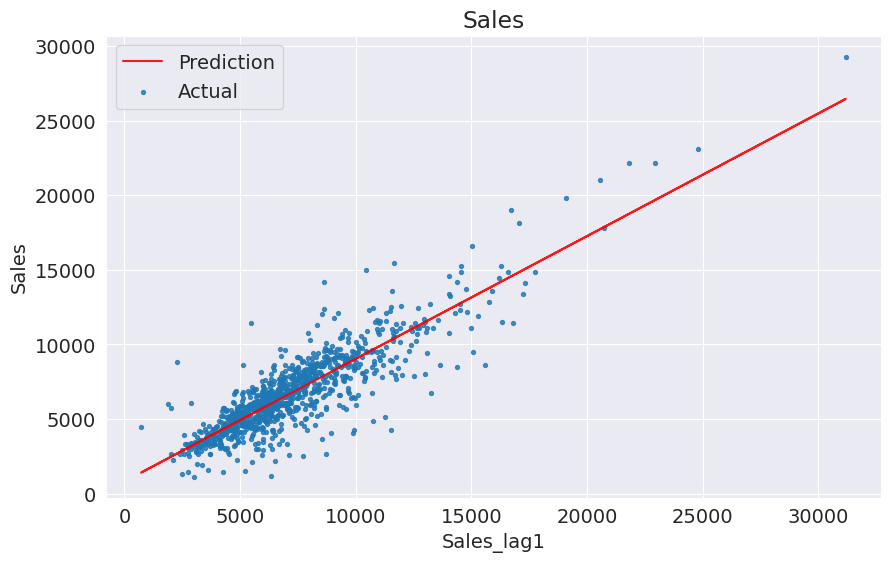

In [ ]:
try_lr_model_for_feature(df=open_df[open_df['Sales_Lag1'] > 0].sample(1000))

RMSE Loss:  2403.2139173330497


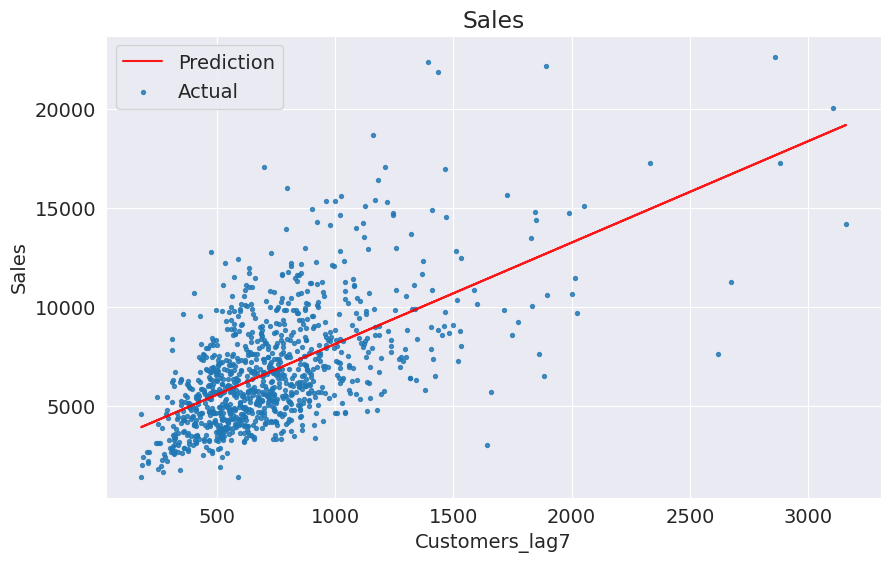

In [ ]:
try_lr_model_for_feature(df=open_df[open_df['Customers_Lag7'] > 0].sample(1000), feature='Customers_Lag7')

RMSE Loss:  3238.1214083734035


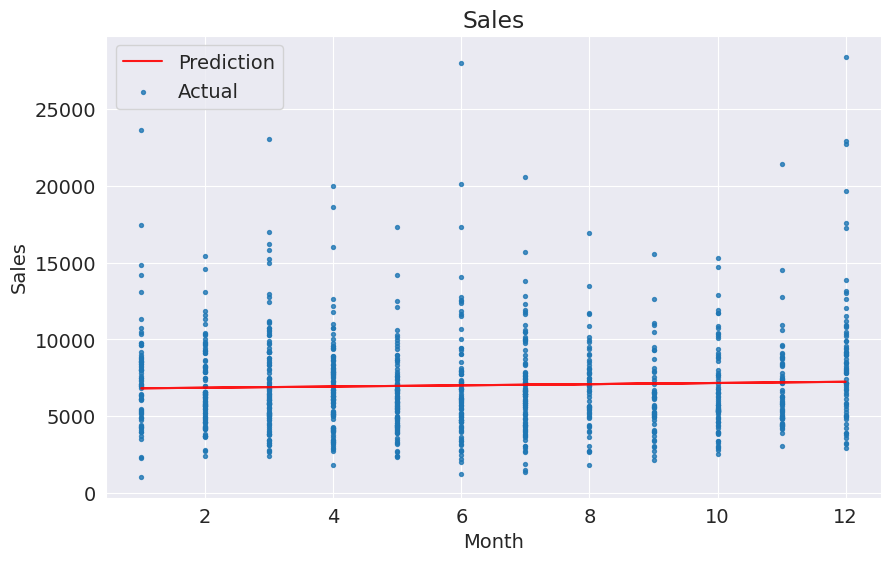

In [ ]:
try_lr_model_for_feature(feature='Month')

RMSE Loss:  3235.4979460973595


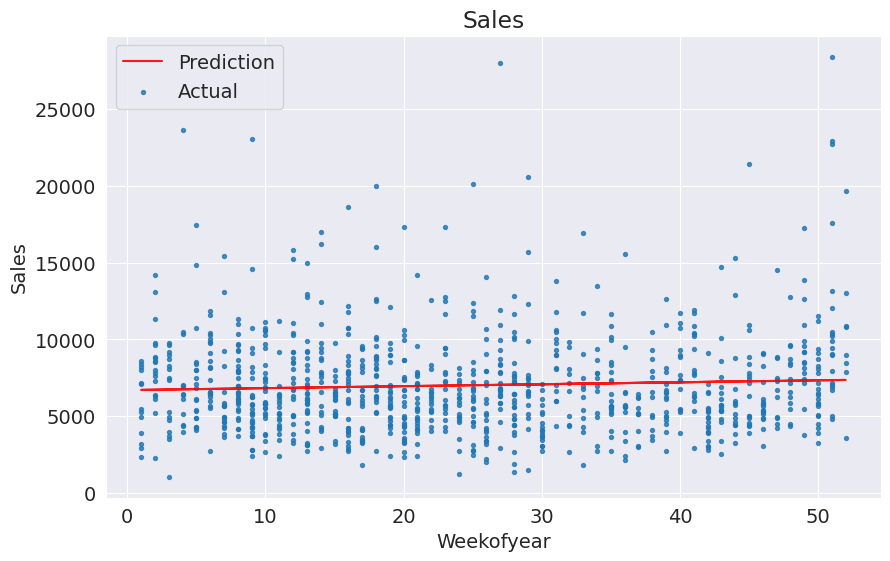

In [ ]:
try_lr_model_for_feature(feature='WeekOfYear')

It seems that linear regression may not be suitable for predicting seasonality-related patterns.

# LogisticRegression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

## Define High Sales column

In [ ]:
open_high_sales_ext_df = open_df.copy()
open_high_sales_ext_df['High_Sales'] = (open_high_sales_ext_df['Sales'] > open_high_sales_ext_df['Sales'].median()).astype(int)

In [ ]:
open_high_sales_ext_df.High_Sales.value_counts()

High_Sales
0    408315
1    408315
Name: count, dtype: int64

## Result and Metrics

In [ ]:
def show_logistic_reg_result(
  model=LogisticRegression(solver='liblinear'),
  mode='Validation'
):
  X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(
      df=open_high_sales_ext_df,
      normalize_outliers=True,
      impute_strategy='median',
      target_col='High_Sales')

  model.fit(X_train, y_train)

  if (mode == 'Test'):
    preds = model.predict(X_test)
    predict_targets = y_test
  elif (mode == 'Train'):
    preds = model.predict(X_train)
    predict_targets = y_train
  else:
    preds = model.predict(X_val)
    predict_targets = y_val

  accuracy = accuracy_score(predict_targets, preds)
  f1 = f1_score(predict_targets, preds)
  prec = precision_score(predict_targets, preds)
  rec = recall_score(predict_targets, preds)
  print("Accuracy: {:.2f}%".format(accuracy * 100))
  print("Precision: {:.2f}%".format(prec * 100))
  print("F1: {:.2f}%".format(f1 * 100))
  print("Recall: {:.2f}%".format(rec * 100))

  cf = confusion_matrix(predict_targets, preds, normalize='true')
  plt.figure(figsize=(3.2, 2.4))
  sns.heatmap(cf, annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format(mode));
  plt.show()

Accuracy: 87.64%
Precision: 91.41%
F1: 87.74%
Recall: 84.35%


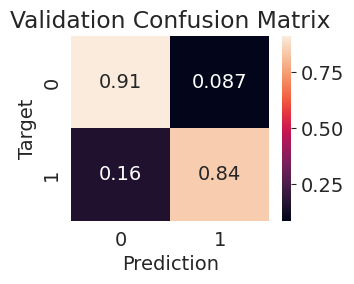

In [ ]:
show_logistic_reg_result()

Accuracy: 87.40%
Precision: 91.14%
F1: 87.51%
Recall: 84.15%


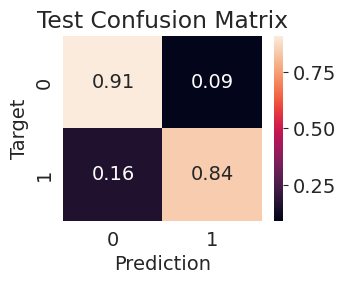

In [ ]:
show_logistic_reg_result(mode='Test')

Accuracy: 88.34%
Precision: 88.68%
F1: 88.05%
Recall: 87.43%


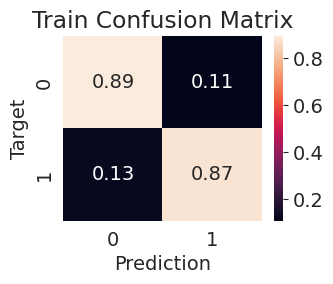

In [ ]:
show_logistic_reg_result(mode='Train')

*   Accuracy is the proportion of correct predictions overall.
*   Precision measures how many predicted positives are actually positive. (top left in confusion matrix)
*   Recall measures how many actual positives were correctly identified. (bottom rught in confusion matrix)
*   F1 is the harmonic mean of precision and recall, balancing both:





# Decision Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
def test_dt_model(
    model=DecisionTreeRegressor(max_depth=15, random_state=42),
    normalize_outliers=True, impute_strategy='median', scaler_type='normalized', impute=True, impute_lag=True):
  X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(
      normalize_outliers=normalize_outliers,
      impute_strategy=impute_strategy,
      scaler_type=scaler_type, impute=impute, impute_lag=impute_lag
    )

  model.fit(X_train, y_train)

  # print('max_depth: ' + str(model.tree_.max_depth))

  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  test_preds = model.predict(X_test)

  train_loss = rmse(y_train, train_preds)
  val_loss = rmse(y_val, val_preds)
  test_loss = rmse(y_test, test_preds)

  return {
      'Train Loss': train_loss,
      'Val Loss': val_loss,
      'Test Loss': test_loss
  }

In [88]:
test_dt_model()

{'Train Loss': np.float64(760.87),
 'Val Loss': np.float64(1165.19),
 'Test Loss': np.float64(1162.63)}

## Max Depth

In [ ]:
def max_depth_loss(md):
    result = test_dt_model(model=DecisionTreeRegressor(max_depth=md, random_state=42))
    return {'Max Depth': md, 'Train Loss': result['Train Loss'], 'Validation Loss': result['Val Loss']}

def show_plots_for_dt_max_depth_options(options=range(1, 20, 2)):
  loss_df = pd.DataFrame([max_depth_loss(md) for md in options])
  plt.figure()
  plt.plot(loss_df['Max Depth'], loss_df['Train Loss'])
  plt.plot(loss_df['Max Depth'], loss_df['Validation Loss'])
  plt.title('Training vs. Validation Loss')
  plt.xticks(range(0,21, 2))
  plt.xlabel('Max. Depth')
  plt.ylabel('Prediction Loss')
  plt.legend(['Training', 'Validation'])

CPU times: user 3min 8s, sys: 9.51 s, total: 3min 17s
Wall time: 3min 28s


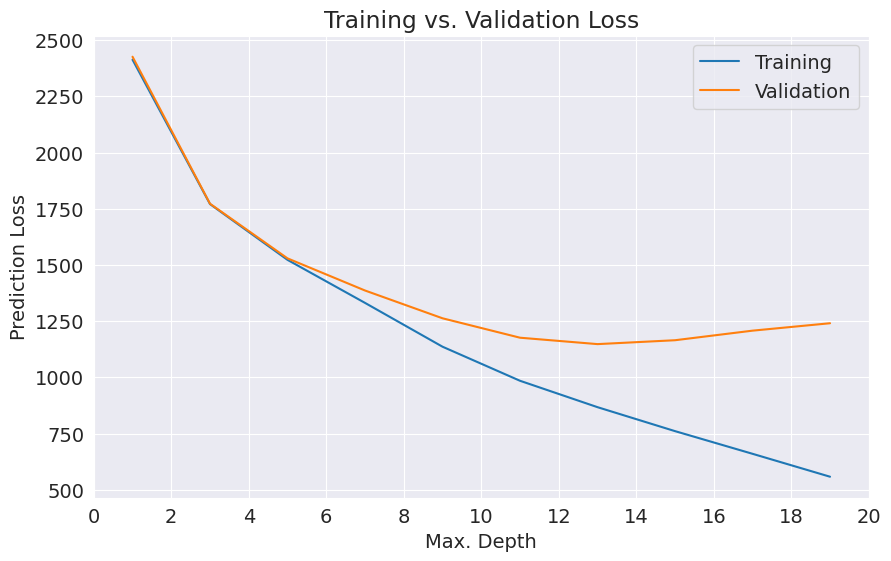

In [ ]:
%%time
show_plots_for_dt_max_depth_options()

From the plot above, a max_depth value of 13 appears to be optimal. Let’s use this value in the next step when determining the optimal min_samples_split.

## Min Samples Split

In [ ]:
def min_samples_split_loss(mss):
    result = test_dt_model(model=DecisionTreeRegressor(max_depth=13, min_samples_split=mss, random_state=42))
    return {'Min Samples Split': mss, 'Train Loss': result['Train Loss'], 'Validation Loss': result['Val Loss']}

def show_plots_for_dt_min_samples_split_options(options=range(2, 20, 2)):
  loss_df = pd.DataFrame([min_samples_split_loss(md) for md in options])
  plt.figure()
  plt.plot(loss_df['Min Samples Split'], loss_df['Train Loss'])
  plt.plot(loss_df['Min Samples Split'], loss_df['Validation Loss'])
  plt.title('Training vs. Validation Loss')
  plt.xticks(range(0,21, 2))
  plt.xlabel('Min Samples Split')
  plt.ylabel('Prediction Loss')
  plt.legend(['Training', 'Validation'])

CPU times: user 3min 56s, sys: 7.19 s, total: 4min 3s
Wall time: 4min 51s


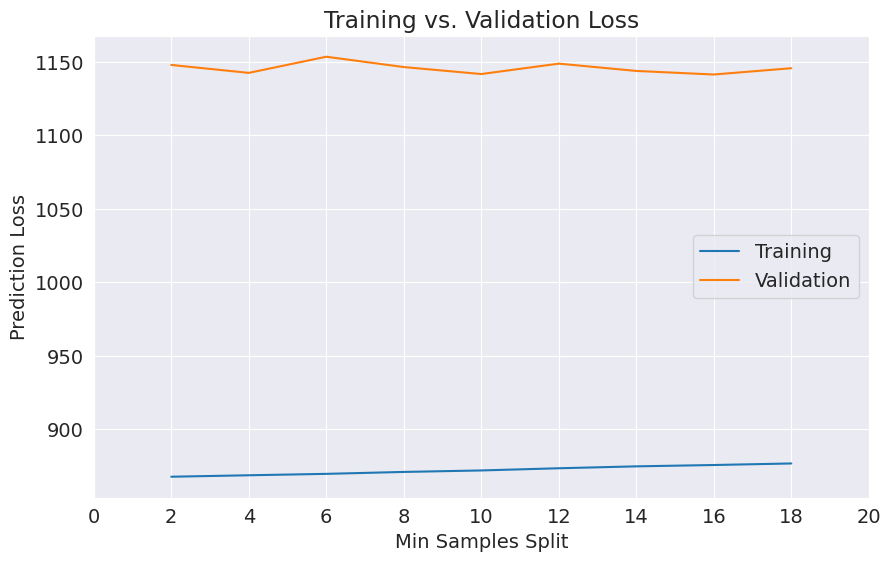

In [ ]:
%%time
show_plots_for_dt_min_samples_split_options()

It seems like min_samples_split=4 is OK

## Data Preprocessing Cases

In [268]:
test_dt_model(model=DecisionTreeRegressor(max_depth=13, min_samples_split=4, random_state=42))

{'Train Loss': np.float64(868.51),
 'Val Loss': np.float64(1145.09),
 'Test Loss': np.float64(1138.01)}

In [269]:
test_dt_model(model=DecisionTreeRegressor(max_depth=13, min_samples_split=4, random_state=42), impute_lag=False)

{'Train Loss': np.float64(824.55),
 'Val Loss': np.float64(1140.51),
 'Test Loss': np.float64(1132.96)}

In [270]:
test_dt_model(model=DecisionTreeRegressor(max_depth=13, min_samples_split=4, random_state=42), impute=False)

{'Train Loss': np.float64(824.56),
 'Val Loss': np.float64(1141.86),
 'Test Loss': np.float64(1128.39)}

In [271]:
test_dt_model(model=DecisionTreeRegressor(max_depth=13, min_samples_split=4, random_state=42), normalize_outliers=False)

{'Train Loss': np.float64(879.26),
 'Val Loss': np.float64(1145.31),
 'Test Loss': np.float64(1129.63)}

Disabling lag feature imputation (impute_lag=False) appears to improve the overall prediction accuracy.

## Final DT Model

In [96]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(
    normalize_outliers=True,
    impute_lag=False,
    scaler_type='normalized'
  )

dt_model = DecisionTreeRegressor(max_depth=13, min_samples_split=4, random_state=42)

In [97]:
%%time
dt_model.fit(X_train, y_train)

CPU times: user 17 s, sys: 87.4 ms, total: 17.1 s
Wall time: 17.3 s


DecisionTreeRegressor(max_depth=13, min_samples_split=4, random_state=42)

In [98]:
%%time
dt_val_preds = dt_model.predict(X_val)

CPU times: user 42.7 ms, sys: 0 ns, total: 42.7 ms
Wall time: 43 ms


## Tree Visualization



In [99]:
from sklearn.tree import plot_tree, export_text

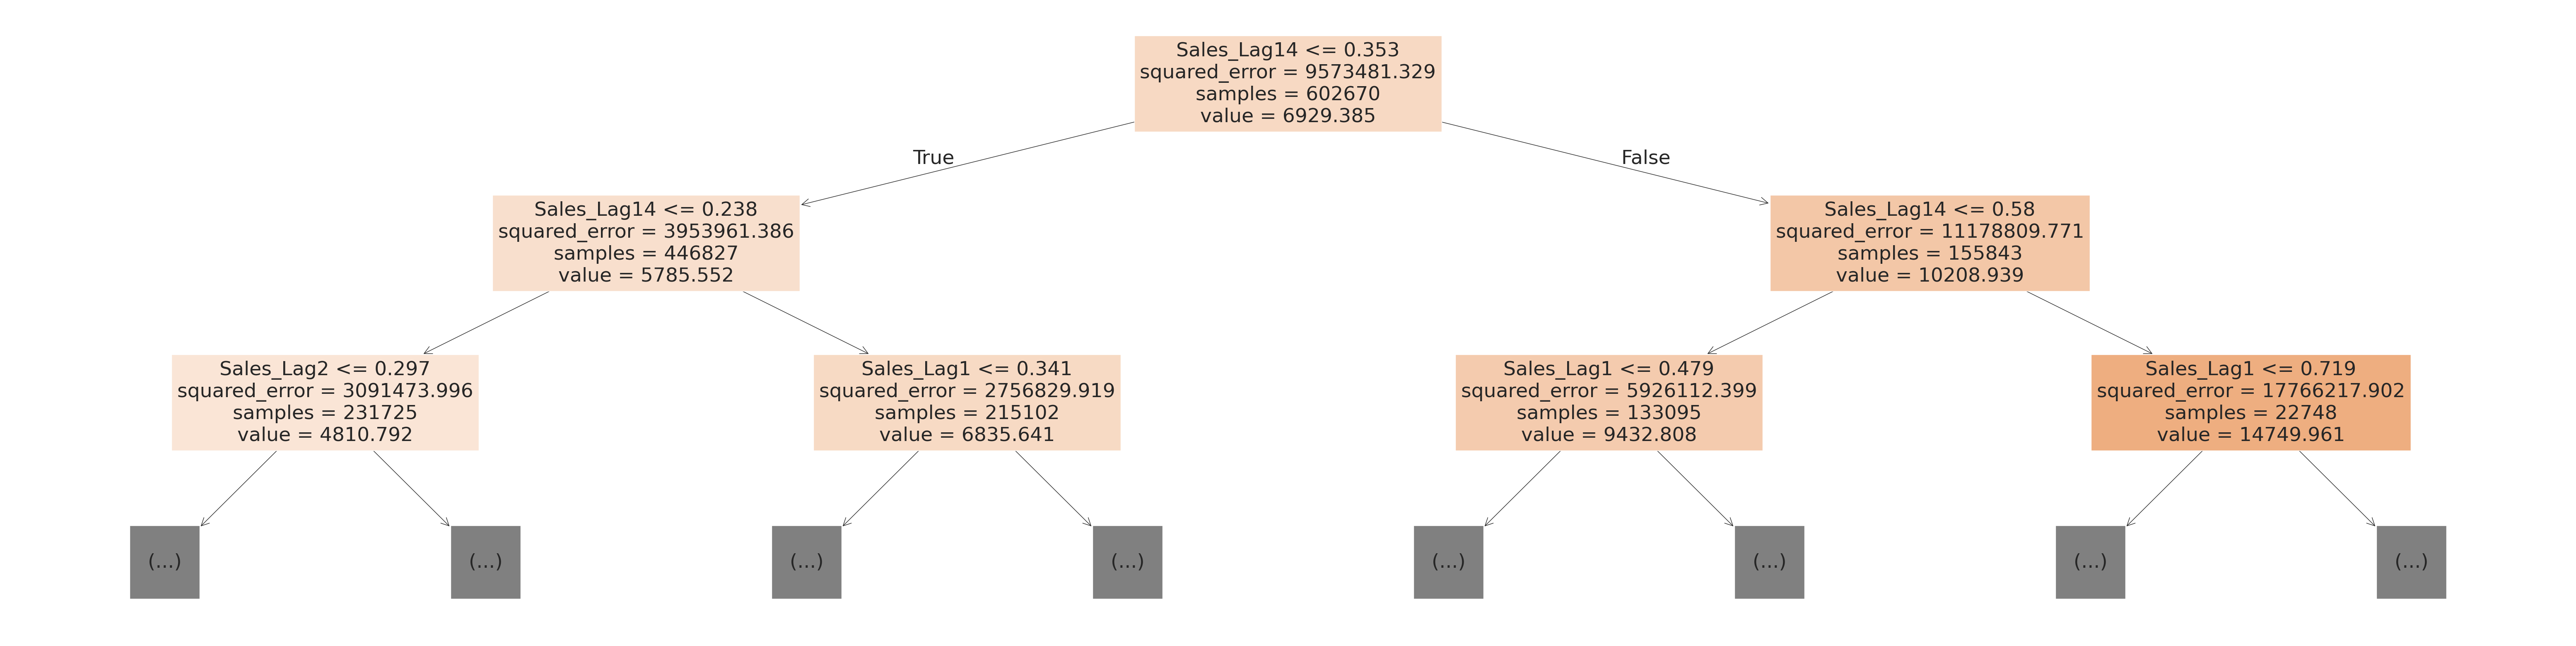

In [100]:
plt.figure(figsize=(80,20))
plot_tree(dt_model, feature_names=X_train.columns, max_depth=2, filled=True);

In [101]:
tree_text = export_text(dt_model, max_depth=4, feature_names=list(X_train.columns))
print(tree_text)

|--- Sales_Lag14 <= 0.35
|   |--- Sales_Lag14 <= 0.24
|   |   |--- Sales_Lag2 <= 0.30
|   |   |   |--- Sales_Lag14 <= 0.18
|   |   |   |   |--- Promo <= 0.50
|   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |--- Promo >  0.50
|   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |--- Sales_Lag14 >  0.18
|   |   |   |   |--- Sales_Lag1 <= 0.32
|   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |--- Sales_Lag1 >  0.32
|   |   |   |   |   |--- truncated branch of depth 9
|   |   |--- Sales_Lag2 >  0.30
|   |   |   |--- Sales_Lag14 <= 0.01
|   |   |   |   |--- Sales_Lag2 <= 0.52
|   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |--- Sales_Lag2 >  0.52
|   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |--- Sales_Lag14 >  0.01
|   |   |   |   |--- DayOfWeek <= 0.75
|   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |--- DayOfWeek >  0.75
|   |   |   |   |   |--- truncated branch of depth 9
| 

## Feature Importance

In [102]:
dt_model.feature_importances_.round(2)

array([0.01, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01,
       0.02, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.11, 0.06, 0.02, 0.04, 0.66, 0.  , 0.  , 0.01, 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

                  feature  importance
26            Sales_Lag14    0.662581
22             Sales_Lag1    0.109030
23             Sales_Lag2    0.055220
25             Sales_Lag7    0.037622
1                   Promo    0.027660
11             WeekOfYear    0.018655
24             Sales_Lag3    0.015450
10                    Day    0.013997
13              DayOfYear    0.013500
0               DayOfWeek    0.012127
30  SalesPerCustomer_Lag1    0.007894
29         Customers_Lag7    0.005794
28         Customers_Lag1    0.004141
14              IsWeekend    0.003050
32       DaysAfterHoliday    0.002218


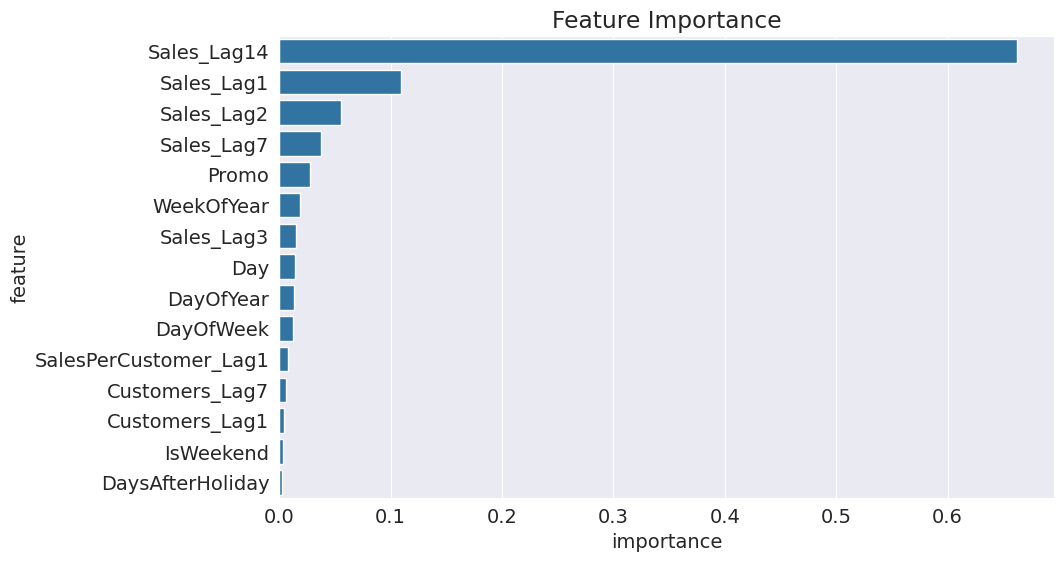

In [103]:
def show_dt_feature_importance():
  importance_df = pd.DataFrame({
      'feature': X_train.columns,
      'importance': dt_model.feature_importances_
  }).sort_values('importance', ascending=False)

  print(importance_df.head(15))

  plt.title('Feature Importance')
  sns.barplot(data=importance_df.head(15), x='importance', y='feature');

show_dt_feature_importance()


Although the prediction performance of the Decision Tree model is better than that of Linear Regression, the feature importance distribution appears more balanced in the Linear Regression model. In contrast, the Decision Tree model heavily relies on Sales lag features, which play a crucial role in its predictions.

# Random Forest

In [272]:
from sklearn.ensemble import RandomForestRegressor

In [273]:
def test_rf_model(
    model=RandomForestRegressor(n_jobs=-1, n_estimators=10, max_depth=10, random_state=42, max_features=0.5),
    normalize_outliers=True, impute_strategy='median', scaler_type='normalized', impute=True, impute_lag=True):
  X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(
      normalize_outliers=normalize_outliers,
      impute_strategy=impute_strategy,
      scaler_type=scaler_type, impute=impute, impute_lag=impute_lag
    )

  model.fit(X_train, y_train)

  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  test_preds = model.predict(X_test)

  train_loss = rmse(y_train, train_preds)
  val_loss = rmse(y_val, val_preds)
  test_loss = rmse(y_test, test_preds)

  return {
      'Train Loss': train_loss,
      'Val Loss': val_loss,
      'Test Loss': test_loss
  }

In [108]:
%%time
test_rf_model()

CPU times: user 1min 8s, sys: 1.02 s, total: 1min 9s
Wall time: 42.3 s


{'Train Loss': np.float64(936.29),
 'Val Loss': np.float64(1059.61),
 'Test Loss': np.float64(1047.57)}

## N Estimators

In [ ]:
def n_estimators_loss(ne):
    result = test_rf_model(model=RandomForestRegressor(n_estimators=ne, max_depth=10, random_state=42, max_features=0.5))
    return {'N Estimators': ne, 'Train Loss': result['Train Loss'], 'Validation Loss': result['Val Loss']}

def show_plots_for_rf_n_estimators_options(options=range(10, 110, 10)):
  loss_df = pd.DataFrame([n_estimators_loss(ne) for ne in options])
  plt.figure()
  plt.plot(loss_df['N Estimators'], loss_df['Train Loss'])
  plt.plot(loss_df['N Estimators'], loss_df['Validation Loss'])
  plt.title('Training vs. Validation Loss')
  plt.xticks(range(0, 110, 10))
  plt.xlabel('N Estimators')
  plt.ylabel('Prediction Loss')
  plt.legend(['Training', 'Validation'])

CPU times: user 48min 16s, sys: 8.62 s, total: 48min 25s
Wall time: 49min 45s


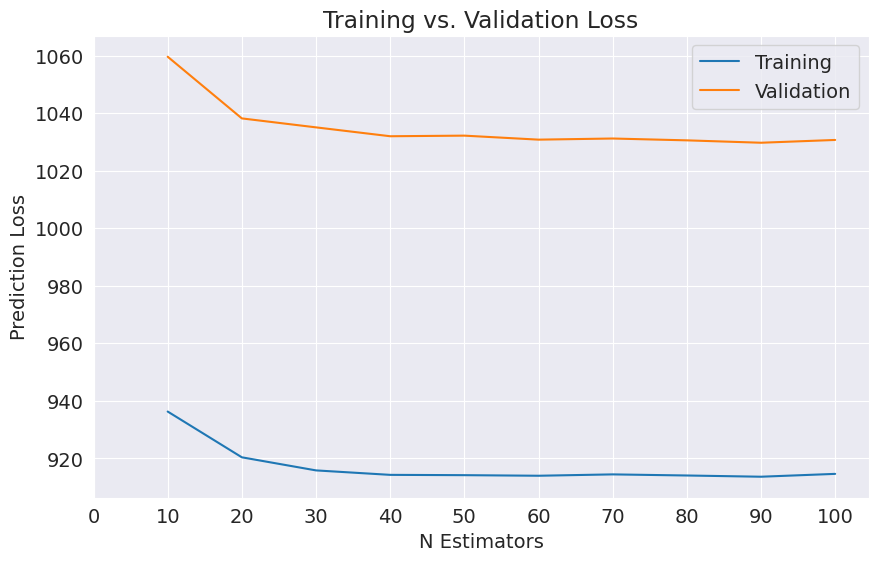

In [ ]:
%%time
show_plots_for_rf_n_estimators_options()

20 N estimators are enough for good prediction

## Max Depth

In [ ]:
def max_depth_rf_loss(md):
    result = test_rf_model(model=RandomForestRegressor(n_estimators=20, max_depth=md, random_state=42, max_features=0.5))
    return {'Max Depth': md, 'Train Loss': result['Train Loss'], 'Validation Loss': result['Val Loss']}

def show_plots_for_rf_max_depth_options(options=range(7, 14, 2)):
  loss_df = pd.DataFrame([max_depth_rf_loss(md) for md in options])
  plt.figure()
  plt.plot(loss_df['Max Depth'], loss_df['Train Loss'])
  plt.plot(loss_df['Max Depth'], loss_df['Validation Loss'])
  plt.title('Training vs. Validation Loss')
  plt.xticks(range(6, 15, 1))
  plt.xlabel('Max Depth')
  plt.ylabel('Prediction Loss')
  plt.legend(['Training', 'Validation'])

CPU times: user 7min 3s, sys: 3.27 s, total: 7min 6s
Wall time: 7min 12s


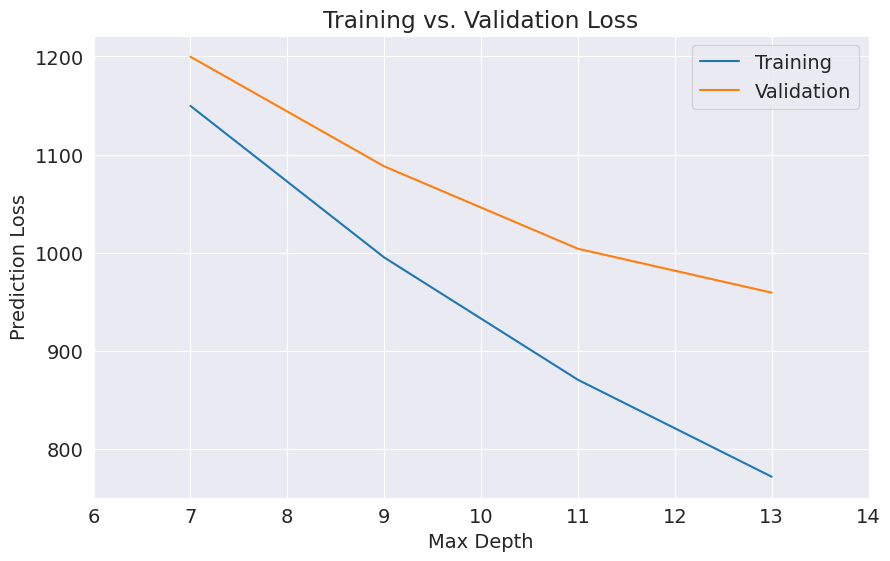

In [ ]:
%%time
show_plots_for_rf_max_depth_options()

13 value is good for max depth param

## Max Features

In [ ]:
# try 'log2', 'sqrt', 0.25, 0.5, 0.75

In [109]:
%%time
test_rf_model(model=RandomForestRegressor(n_estimators=20, max_depth=13, random_state=42, max_features='log2'))

CPU times: user 31.7 s, sys: 755 ms, total: 32.4 s
Wall time: 33.1 s


{'Train Loss': np.float64(950.92),
 'Val Loss': np.float64(1109.79),
 'Test Loss': np.float64(1101.62)}

In [110]:
%%time
test_rf_model(model=RandomForestRegressor(n_estimators=20, max_depth=13, random_state=42, max_features='sqrt'))

CPU times: user 41 s, sys: 837 ms, total: 41.9 s
Wall time: 42.2 s


{'Train Loss': np.float64(875.93),
 'Val Loss': np.float64(1035.57),
 'Test Loss': np.float64(1026.37)}

In [111]:
%%time
test_rf_model(model=RandomForestRegressor(n_estimators=20, max_depth=13, random_state=42, max_features=0.25))

CPU times: user 1min 6s, sys: 805 ms, total: 1min 7s
Wall time: 1min 7s


{'Train Loss': np.float64(790.41),
 'Val Loss': np.float64(976.49),
 'Test Loss': np.float64(962.48)}

In [112]:
%%time
test_rf_model(model=RandomForestRegressor(n_estimators=20, max_depth=13, random_state=42, max_features=0.5))

CPU times: user 2min 6s, sys: 869 ms, total: 2min 7s
Wall time: 2min 8s


{'Train Loss': np.float64(772.02),
 'Val Loss': np.float64(959.46),
 'Test Loss': np.float64(945.07)}

In [113]:
%%time
test_rf_model(model=RandomForestRegressor(n_estimators=20, max_depth=13, random_state=42, max_features=0.75))

CPU times: user 3min 5s, sys: 843 ms, total: 3min 6s
Wall time: 3min 7s


{'Train Loss': np.float64(773.62),
 'Val Loss': np.float64(968.84),
 'Test Loss': np.float64(954.85)}

max_features=0.5 is optimal for random forest model

## Data Preprocessing Cases

In [274]:
%%time
# default
test_rf_model(model=RandomForestRegressor(n_estimators=20, max_depth=13, random_state=42, max_features=0.5))

CPU times: user 2min 6s, sys: 944 ms, total: 2min 7s
Wall time: 2min 11s


{'Train Loss': np.float64(773.27),
 'Val Loss': np.float64(959.37),
 'Test Loss': np.float64(945.24)}

In [275]:
%%time
# impute_lag=False
test_rf_model(model=RandomForestRegressor(n_estimators=20, max_depth=13, random_state=42, max_features=0.5), impute_lag=False)

CPU times: user 2min 3s, sys: 682 ms, total: 2min 4s
Wall time: 2min 5s


{'Train Loss': np.float64(743.5),
 'Val Loss': np.float64(949.1),
 'Test Loss': np.float64(937.68)}

In [276]:
%%time
# impute=False
test_rf_model(model=RandomForestRegressor(n_estimators=20, max_depth=13, random_state=42, max_features=0.5), impute=False)

CPU times: user 2min 2s, sys: 711 ms, total: 2min 3s
Wall time: 2min 4s


{'Train Loss': np.float64(740.86),
 'Val Loss': np.float64(946.81),
 'Test Loss': np.float64(935.43)}

In [277]:
%%time
# normalize_outliers=False
test_rf_model(model=RandomForestRegressor(n_estimators=20, max_depth=13, random_state=42, max_features=0.5), normalize_outliers=False)

CPU times: user 2min 7s, sys: 1.06 s, total: 2min 9s
Wall time: 2min 9s


{'Train Loss': np.float64(784.93),
 'Val Loss': np.float64(953.13),
 'Test Loss': np.float64(943.68)}

Disabling feature imputation (impute=False) appears to improve the overall prediction accuracy for random forest model.



## Final RF model

In [279]:
rf_model = RandomForestRegressor(n_jobs=-1, n_estimators=20, max_depth=13, random_state=42, max_features=0.5)

In [280]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(
    normalize_outliers=True,
    impute=True,
    impute_lag=True,
    impute_strategy='median',
    scaler_type='normalized'
  )

In [281]:
%%time
rf_model.fit(X_train, y_train)

CPU times: user 2min 40s, sys: 520 ms, total: 2min 40s
Wall time: 1min 50s


RandomForestRegressor(max_depth=13, max_features=0.5, n_estimators=20,
                      n_jobs=-1, random_state=42)

In [379]:
%%time
rf_val_preds = rf_model.predict(X_val)

CPU times: user 663 ms, sys: 6.71 ms, total: 670 ms
Wall time: 568 ms


## Feature Importance

           feature  importance
26     Sales_Lag14    0.412819
22      Sales_Lag1    0.210281
23      Sales_Lag2    0.139640
24      Sales_Lag3    0.041236
25      Sales_Lag7    0.040421
1            Promo    0.037913
28  Customers_Lag1    0.022691
13       DayOfYear    0.014807
0        DayOfWeek    0.013295
10             Day    0.012248
29  Customers_Lag7    0.012138
27     Sales_Lag30    0.011857
11      WeekOfYear    0.010827
14       IsWeekend    0.004401
16      IsMonthEnd    0.002245


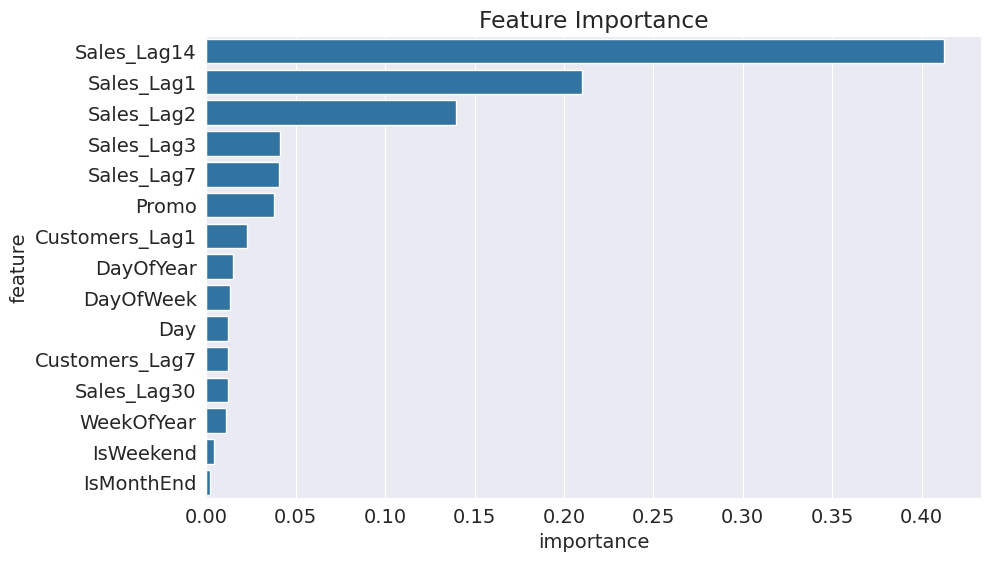

In [283]:
def show_rf_feature_importance():
  importance_df = pd.DataFrame({
      'feature': X_train.columns,
      'importance': rf_model.feature_importances_
  }).sort_values('importance', ascending=False)

  print(importance_df.head(15))

  plt.title('Feature Importance')
  sns.barplot(data=importance_df.head(15), x='importance', y='feature');

show_rf_feature_importance()

The feature importance in the Random Forest model is more balanced compared to that of the Decision Tree model.

# Models results compare

In [284]:
def get_compare_result():
  # Define the data
  data = {
      'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
      'RMSE train': [1288.26, 824.55, 743.5],
      'RMSE validate': [1279.63, 1140.51, 949.1],
      'RMSE test': [1266.5, 1132.96, 937.68],
      'fit time': ['3.5 s', '18.1 s', '1min 51s'],
      'predict time': ['52 ms', '43.5 ms', '291 ms']
  }

  # Create DataFrame
  comp_df = pd.DataFrame(data)

  # Display it
  return comp_df

get_compare_result()


Model  RMSE train  RMSE validate  RMSE test  fit time  \
0  Linear Regression     1288.26        1279.63    1266.50     3.5 s   
1      Decision Tree      824.55        1140.51    1132.96    18.1 s   
2      Random Forest      743.50         949.10     937.68  1min 51s   

  predict time  
0        52 ms  
1      43.5 ms  
2       291 ms

# Mistakes Analysis

In [285]:
def get_rf_errors_sorted(X_val=X_val):
  errors_df = X_val.copy()
  errors_df['Actual'] = y_val
  errors_df['Predicted'] = rf_val_preds
  errors_df['Error'] = abs(y_val - rf_val_preds).round(1)

  errors_df_sorted = errors_df.sort_values(by='Error', ascending=False)

  return errors_df_sorted[['Month', 'Day', 'DayOfWeek', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Actual', 'Predicted', 'Error']]

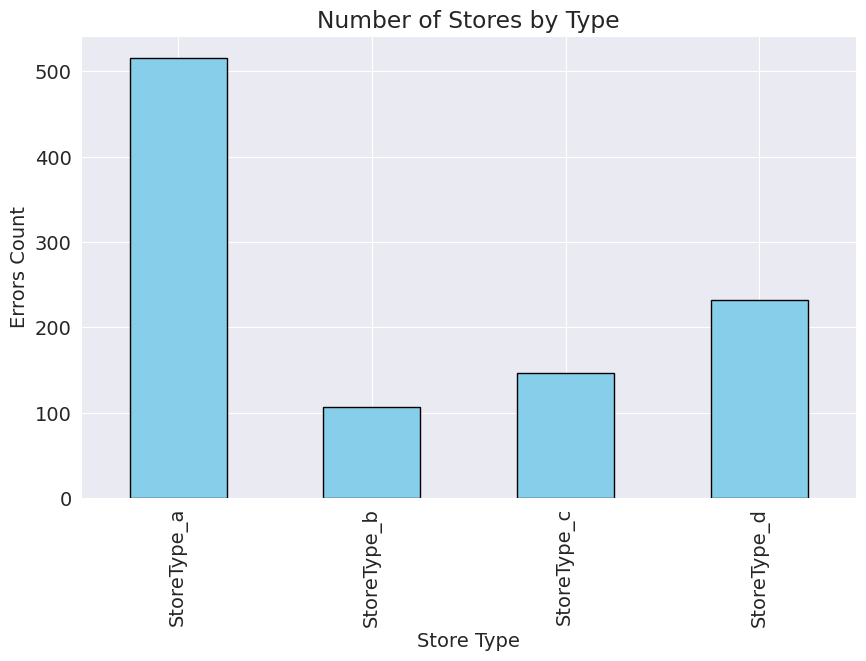

In [286]:
def show_rf_errors_analys(n):
  X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(
      normalize_outliers=True,
      impute=True,
      impute_lag=True,
      impute_strategy='median',
      scaler_type=None
    )

  err_df = get_rf_errors_sorted(X_val=X_val).head(n)
  show_histogram(df=err_df, x='DayOfWeek', nbins=14, title='Erros per DayOfWeek')

  store_cols = ['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d']

  err_df[store_cols].sum().plot(kind='bar', color='skyblue', edgecolor='black')

  plt.title('Number of Stores by Type')
  plt.ylabel('Errors Count')
  plt.xlabel('Store Type')
  plt.show()

show_rf_errors_analys(1000)

Among the 1000 largest prediction errors, we observe that errors occur more frequently on Mondays compared to other days. Additionally, higher error rates are seen for Store Type A compare to other store types

# Save Model

In [287]:
import joblib

In [288]:
# hepper function to prepare preprocessors
def get_preprocessors_for_setup_ext(df=open_df, input_cols=get_input_cols(),
    target_col=target_col, scaler_type='normalized',
    impute=True, impute_strategy='mean', impute_lag=True,
    normalize_outliers=False):

  input_cols=get_input_cols()
  train_df, val_df, test_df = split_train_val_test(df=open_df)

  if (normalize_outliers):
    train_df = get_outliers_normalized(df=train_df)

  train_inputs = train_df[input_cols].copy()

  return get_preprocessors_for_setup(
      train_inputs=train_inputs,
      scaler_type=scaler_type,
      impute=impute,
      impute_strategy=impute_strategy,
      impute_lag=impute_lag
  )

In [289]:
input_cols=get_input_cols()
(
  numeric_cols,
  categorical_cols,
  encoded_cols,
  impute_cols,
  imputer,
  scaler,
  encoder
) = get_preprocessors_for_setup_ext(
    input_cols=input_cols,
    impute=True, impute_strategy='median', impute_lag=True,
    normalize_outliers=True
)

rossmann_sales = {
    'model': rf_model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'impute_cols': impute_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [290]:
joblib.dump(rossmann_sales, 'rossmann_sales.joblib', compress=('zlib', 3))

['rossmann_sales.joblib']

In [291]:
rossmann_sales_dump = joblib.load('rossmann_sales.joblib')

In [292]:
def check_model(model=rossmann_sales_dump['model']):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  test_preds = model.predict(X_test)

  train_loss = rmse(y_train, train_preds)
  val_loss = rmse(y_val, val_preds)
  test_loss = rmse(y_test, test_preds)

  print(f'Train loss: {train_loss}')
  print(f'Val loss: {val_loss}')
  print(f'Test loss: {test_loss}')

check_model(model=rossmann_sales_dump['model'])

Train loss: 773.27
Val loss: 959.37
Test loss: 945.24


# Feature Calculation

## Define Input

In [355]:
input_values = {
    'CompetitionDistance': 1500,
    'Date': '2016-02-04',
    'Promo': 1,
    'StateHoliday': '0',
    'SchoolHoliday': 0,
    'StoreType': 'c',
    'Assortment': 'a',
    'Promo2': 1,
    'Promo2SinceWeek': 5,
    'Promo2SinceYear': 2013,
    'PromoInterval': 'Feb,May,Aug,Nov',
    'CompetitionOpenSinceMonth': 1,
    'CompetitionOpenSinceYear': 2015,
    'DaysAfterHoliday': 3,
    'DaysBeforeHoliday': 3,
    'Sales_Lag1': 0,
    'Sales_Lag2': 0,
    'Sales_Lag3': 0,
    'Sales_Lag7': 0,
    'Sales_Lag14': 0,
    'Sales_Lag30': 0,
    'Customers_Lag1': 0,
    'Customers_Lag7': 0,
    'SalesPerCustomer_Lag1': 0
}

to_be_calculated = {
    'DayOfWeek': 0,
    'Year': 0,
    'Month': 0,
    'Day': 0,
    'WeekOfYear': 0,
    'Quarter': 0,
    'DayOfYear': 0,
    'IsWeekend': 0,
    'IsMonthStart': 0,
    'IsMonthEnd': 0,
    'IsQuarterStart': 0,
    'IsQuarterEnd': 0,
    'CompetitionDistanceCategory': '',
    'CompetitionMonthsOpen': 0,
    'Promo2Weeks': 0,
    'IsPromoMonth': 0,
    'PromoWeekend': 0
}

In [356]:
df_input = pd.DataFrame([input_values])
df_input

CompetitionDistance        Date  Promo StateHoliday  SchoolHoliday  \
0                 1500  2016-02-04      1            0              0   

  StoreType Assortment  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0         c          a       1                5             2013   

     PromoInterval  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0  Feb,May,Aug,Nov                          1                      2015   

   DaysAfterHoliday  DaysBeforeHoliday  Sales_Lag1  Sales_Lag2  Sales_Lag3  \
0                 3                  3           0           0           0   

   Sales_Lag7  Sales_Lag14  Sales_Lag30  Customers_Lag1  Customers_Lag7  \
0           0            0            0               0               0   

   SalesPerCustomer_Lag1  
0                      0

## Date Features

In [357]:
# day of the week 1 - 7
open_df.DayOfWeek.value_counts()

DayOfWeek
6    139631
2    139520
3    136400
5    134213
1    133135
4    130214
7      3517
Name: count, dtype: int64

In [358]:
def calculate_date_features(df_input):
  # convert date related features
  # Convert to datetime
  df_input['Date'] = pd.to_datetime(df_input['Date'])

  # Extract date-based features
  df_input['DayOfWeek']     = df_input['Date'].dt.dayofweek + 1      # Monday=1, Sunday=7
  df_input['Year']          = df_input['Date'].dt.year
  df_input['Month']         = df_input['Date'].dt.month
  df_input['Day']           = df_input['Date'].dt.day
  df_input['WeekOfYear']    = df_input['Date'].dt.isocalendar().week
  df_input['Quarter']       = df_input['Date'].dt.quarter
  df_input['DayOfYear']     = df_input['Date'].dt.dayofyear
  df_input['IsWeekend']     = df_input['DayOfWeek'].isin([6, 7]).astype(int)
  df_input['IsMonthStart']  = df_input['Date'].dt.is_month_start.astype(int)
  df_input['IsMonthEnd']    = df_input['Date'].dt.is_month_end.astype(int)
  df_input['IsQuarterStart']= df_input['Date'].dt.is_quarter_start.astype(int)
  df_input['IsQuarterEnd']  = df_input['Date'].dt.is_quarter_end.astype(int)

  return df_input

df_input = calculate_date_features(df_input)

## Competition Distance and Months Open

In [359]:
# CompetitionDistanceCategory
def calculate_competition_distance_category(df_input):
  bins = [-1, 1000, 2000, 10000, 50000, float('inf')]
  labels = ['Very Close', 'Close', 'Medium', 'Far', 'None']

  df_input['CompetitionDistanceCategory'] = pd.cut(
      df_input['CompetitionDistance'],
      bins=bins,
      labels=labels
  )

  return df_input

df_input = calculate_competition_distance_category(df_input)
df_input[['CompetitionDistance', 'CompetitionDistanceCategory']]

CompetitionDistance CompetitionDistanceCategory
0                 1500                       Close

In [360]:
# CompetitionMonthsOpen
def calculate_competition_months_open(df_input):
  # Ensure 'Date' is datetime
  df_input['Date'] = pd.to_datetime(df_input['Date'])

  # Fill missing values (0) in competition columns if needed
  df_input['CompetitionOpenSinceMonth'] = df_input['CompetitionOpenSinceMonth'].replace(0, pd.NA).astype('Int64')
  df_input['CompetitionOpenSinceYear'] = df_input['CompetitionOpenSinceYear'].replace(0, pd.NA).astype('Int64')

  # Calculate CompetitionMonthsOpen
  df_input['CompetitionMonthsOpen'] = ((df_input['Date'].dt.year - df_input['CompetitionOpenSinceYear']) * 12 +
                                      (df_input['Date'].dt.month - df_input['CompetitionOpenSinceMonth']))

  # For stores with no competition info, fill with 0
  df_input['CompetitionMonthsOpen'] = df_input['CompetitionMonthsOpen'].fillna(0).astype(int)
  df_input['CompetitionOpenSinceMonth'] = df_input['CompetitionOpenSinceMonth'].fillna(0)
  df_input['CompetitionOpenSinceYear'] = df_input['CompetitionOpenSinceYear'].fillna(0)

  return df_input

df_input = calculate_competition_months_open(df_input)
df_input[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Date', 'CompetitionMonthsOpen']]

CompetitionOpenSinceMonth  CompetitionOpenSinceYear       Date  \
0                          1                      2015 2016-02-04   

   CompetitionMonthsOpen  
0                     13

## Promo2 and other

In [361]:
# Promo2Weeks
def calculate_promo2_weeks(df_input):
  # Ensure 'Date' is datetime
  df_input['Date'] = pd.to_datetime(df_input['Date'])

  # Replace 0 with pd.NA for Promo2 start info if needed
  df_input['Promo2SinceYear'] = df_input['Promo2SinceYear'].replace(0, pd.NA).astype('Int64')
  df_input['Promo2SinceWeek'] = df_input['Promo2SinceWeek'].replace(0, pd.NA).astype('Int64')

  # Calculate current week number and year
  current_year = df_input['Date'].dt.isocalendar().year
  current_week = df_input['Date'].dt.isocalendar().week

  # Calculate Promo2Weeks
  df_input['Promo2Weeks'] = ((current_year - df_input['Promo2SinceYear']) * 52 +
                            (current_week - df_input['Promo2SinceWeek']))

  # For stores without Promo2 info, fill with 0
  df_input['Promo2Weeks'] = df_input['Promo2Weeks'].fillna(0).astype(int)
  df_input['Promo2SinceYear'] = df_input['Promo2SinceYear'].fillna(0)
  df_input['Promo2SinceWeek'] = df_input['Promo2SinceWeek'].fillna(0)

  return df_input

df_input = calculate_promo2_weeks(df_input)
df_input[['Promo2SinceYear', 'Promo2SinceWeek', 'Date', 'Promo2Weeks']]

Promo2SinceYear  Promo2SinceWeek       Date  Promo2Weeks
0             2013                5 2016-02-04          156

In [362]:
open_df.PromoInterval.value_counts()

PromoInterval
Jan,Apr,Jul,Oct     234024
Feb,May,Aug,Nov      94750
Mar,Jun,Sept,Dec     78092
Name: count, dtype: int64

In [363]:
# IsPromoMonth
def calculate_is_promo_month(df_input):
  # Convert Date to datetime
  df_input['Date'] = pd.to_datetime(df_input['Date'])

  # Map month number to abbreviated name
  month_abbr = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}

  df_input['MonthStr'] = df_input['Date'].dt.month.map(month_abbr)

  # Check if current month is in PromoInterval
  df_input['IsPromoMonth'] = df_input.apply(
      lambda row: int(row['MonthStr'] in str(row['PromoInterval']).split(',')),
      axis=1
  )

  return df_input

df_input = calculate_is_promo_month(df_input)

df_input[['Date', 'PromoInterval', 'MonthStr', 'IsPromoMonth']]

Date    PromoInterval MonthStr  IsPromoMonth
0 2016-02-04  Feb,May,Aug,Nov      Feb             1

In [364]:
# Calculate PromoWeekend (1 if both Promo and IsWeekend are 1)
def calculate_promo_weekend(df_input):
  df_input['PromoWeekend'] = (df_input['Promo'] & df_input['IsWeekend']).astype(int)
  return df_input

df_input = calculate_promo_weekend(df_input)
df_input[['PromoWeekend', 'Promo', 'IsWeekend']]

PromoWeekend  Promo  IsWeekend
0             0      1          0

# One row prediction

In [365]:
df_input

CompetitionDistance       Date  Promo StateHoliday  SchoolHoliday  \
0                 1500 2016-02-04      1            0              0   

  StoreType Assortment  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0         c          a       1                5             2013   

     PromoInterval  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0  Feb,May,Aug,Nov                          1                      2015   

   DaysAfterHoliday  DaysBeforeHoliday  Sales_Lag1  Sales_Lag2  Sales_Lag3  \
0                 3                  3           0           0           0   

   Sales_Lag7  Sales_Lag14  Sales_Lag30  Customers_Lag1  Customers_Lag7  \
0           0            0            0               0               0   

   SalesPerCustomer_Lag1  DayOfWeek  Year  Month  Day  WeekOfYear  Quarter  \
0                      0          4  2016      2    4           5        1   

   DayOfYear  IsWeekend  IsMonthStart  IsMonthEnd  IsQuarterStart  \
0         35          0             0           0               0   

   IsQuarterEnd CompetitionDistanceCategory  CompetitionMonthsOpen  \
0             0                       Close                     13   

   Promo2Weeks MonthStr  IsPromoMonth  PromoWeekend  
0          156      Feb             1             0

In [366]:
one_row_input = df_input[input_cols]

In [367]:
rossmann_sales_dump.keys()

dict_keys(['model', 'imputer', 'scaler', 'encoder', 'input_cols', 'impute_cols', 'target_col', 'numeric_cols', 'categorical_cols', 'encoded_cols'])

## Impute

In [368]:
df_input[rossmann_sales_dump['impute_cols']] = rossmann_sales_dump['imputer'].transform(df_input[rossmann_sales_dump['impute_cols']])
df_input

CompetitionDistance       Date  Promo StateHoliday  SchoolHoliday  \
0                 1500 2016-02-04      1            0              0   

  StoreType Assortment  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0         c          a       1                5             2013   

     PromoInterval  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0  Feb,May,Aug,Nov                        1.0                    2015.0   

   DaysAfterHoliday  DaysBeforeHoliday  Sales_Lag1  Sales_Lag2  Sales_Lag3  \
0                 3                  3      6517.0      6257.0      6320.0   

   Sales_Lag7  Sales_Lag14  Sales_Lag30  Customers_Lag1  Customers_Lag7  \
0      6297.0       6310.0       6208.0           699.0           676.0   

   SalesPerCustomer_Lag1  DayOfWeek  Year  Month  Day  WeekOfYear  Quarter  \
0               9.172414          4  2016      2    4           5        1   

   DayOfYear  IsWeekend  IsMonthStart  IsMonthEnd  IsQuarterStart  \
0         35          0             0           0               0   

   IsQuarterEnd CompetitionDistanceCategory  CompetitionMonthsOpen  \
0             0                       Close                     13   

   Promo2Weeks MonthStr  IsPromoMonth  PromoWeekend  
0          156      Feb             1             0

## Scale

In [369]:
df_input[rossmann_sales_dump['numeric_cols']] = rossmann_sales_dump['scaler'].transform(df_input[rossmann_sales_dump['numeric_cols']])
df_input

CompetitionDistance       Date  Promo StateHoliday  SchoolHoliday  \
0                 1500 2016-02-04    1.0            0            0.0   

  StoreType Assortment  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0         c          a     1.0              0.1         0.999007   

     PromoInterval  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0  Feb,May,Aug,Nov                   0.083333                       1.0   

   DaysAfterHoliday  DaysBeforeHoliday  Sales_Lag1  Sales_Lag2  Sales_Lag3  \
0          0.428571           0.333333    0.283348    0.272043    0.274783   

   Sales_Lag7  Sales_Lag14  Sales_Lag30  Customers_Lag1  Customers_Lag7  \
0    0.273783     0.274348     0.269913           0.233        0.225333   

   SalesPerCustomer_Lag1  DayOfWeek  Year     Month  Day  WeekOfYear  Quarter  \
0               0.458621        0.5   3.0  0.090909  0.1    0.078431      0.0   

   DayOfYear  IsWeekend  IsMonthStart  IsMonthEnd  IsQuarterStart  \
0   0.093407        0.0           0.0         0.0             0.0   

   IsQuarterEnd CompetitionDistanceCategory  CompetitionMonthsOpen  \
0           0.0                       Close               0.000538   

   Promo2Weeks MonthStr  IsPromoMonth  PromoWeekend  
0     0.001489      Feb           1.0           0.0

## Encode Categorical

In [370]:
df_input_encoded = pd.DataFrame(
    rossmann_sales_dump['encoder'].transform(df_input[rossmann_sales_dump['categorical_cols']]),
    columns=rossmann_sales_dump['encoded_cols'],
    index=df_input.index
)

df_input_encoded

df_input = pd.concat([df_input, df_input_encoded], axis=1)
df_input

CompetitionDistance       Date  Promo StateHoliday  SchoolHoliday  \
0                 1500 2016-02-04    1.0            0            0.0   

  StoreType Assortment  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0         c          a     1.0              0.1         0.999007   

     PromoInterval  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0  Feb,May,Aug,Nov                   0.083333                       1.0   

   DaysAfterHoliday  DaysBeforeHoliday  Sales_Lag1  Sales_Lag2  Sales_Lag3  \
0          0.428571           0.333333    0.283348    0.272043    0.274783   

   Sales_Lag7  Sales_Lag14  Sales_Lag30  Customers_Lag1  Customers_Lag7  \
0    0.273783     0.274348     0.269913           0.233        0.225333   

   SalesPerCustomer_Lag1  DayOfWeek  Year     Month  Day  WeekOfYear  Quarter  \
0               0.458621        0.5   3.0  0.090909  0.1    0.078431      0.0   

   DayOfYear  IsWeekend  IsMonthStart  IsMonthEnd  IsQuarterStart  \
0   0.093407        0.0           0.0         0.0             0.0   

   IsQuarterEnd CompetitionDistanceCategory  CompetitionMonthsOpen  \
0           0.0                       Close               0.000538   

   Promo2Weeks MonthStr  IsPromoMonth  PromoWeekend  StateHoliday_0  \
0     0.001489      Feb           1.0           0.0             1.0   

   StateHoliday_a  StateHoliday_b  StateHoliday_c  StoreType_a  StoreType_b  \
0             0.0             0.0             0.0          0.0          0.0   

   StoreType_c  StoreType_d  Assortment_a  Assortment_b  Assortment_c  \
0          1.0          0.0           1.0           0.0           0.0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                            1.0                            0.0   

   PromoInterval_Mar,Jun,Sept,Dec  PromoInterval_nan  \
0                             0.0                0.0   

   CompetitionDistanceCategory_Close  CompetitionDistanceCategory_Far  \
0                                1.0                              0.0   

   CompetitionDistanceCategory_Medium  CompetitionDistanceCategory_Very Close  \
0                                 0.0                                     0.0   

   CompetitionDistanceCategory_nan  
0                              0.0

## Predict

In [382]:
X_onerow = df_input[rossmann_sales_dump['numeric_cols'] + rossmann_sales_dump['encoded_cols']]
pred_onerow = rossmann_sales_dump['model'].predict(X_onerow)
pred_onerow.round(2)

array([7695.47])